In [ ]:
# מטרת הפרויקט- להסיק מסקנות ותובנות לגבי אופי ואופן התרומות שהתקבלו בעמותה בשנים האחרונות על מנת לתכנן ולייעל את תהליכי גיוס התרומות בעתיד

In [ ]:
# השאלות המחקריות והמסקנות רשומות לאורך הפרויקט, לפני ואחרי כל ניתוח

In [ ]:
# על מנת לבצע את הניתוח יש להשתמש בספריות הבאות:

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as ml
import matplotlib.pyplot as plt
import pyodbc
import sqlalchemy

In [ ]:
# ייבוא של בסיס הנתונים מSQL

In [2]:
conn_str = (
    "Driver={SQL Server};"
    "Server=MC-AOIUL4UH\SQLEXPRESS;"  
    "Database=Donations;"
    "Trusted_Connection=yes;"
)

# יצירת החיבור
conn = pyodbc.connect(conn_str)

In [3]:
regions = pd.read_sql("SELECT * FROM Regions", conn)
donors = pd.read_sql("SELECT * FROM Donors", conn)
donations = pd.read_sql("SELECT * FROM Donations", conn)
credit = pd.read_sql("SELECT * FROM CreditDetails", conn)
checks = pd.read_sql("SELECT * FROM CheckDetails", conn)
receipts = pd.read_sql("SELECT * FROM Receipts", conn)

C:\Users\User\AppData\Local\Temp\ipykernel_7864\1908869311.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions = pd.read_sql("SELECT * FROM Regions", conn)
C:\Users\User\AppData\Local\Temp\ipykernel_7864\1908869311.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  donors = pd.read_sql("SELECT * FROM Donors", conn)
C:\Users\User\AppData\Local\Temp\ipykernel_7864\1908869311.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  donations = pd.read_sql("SELECT * FROM Donations", conn)
C:\Users\User\AppData\Local\Temp\ip

In [ ]:
# לאחר ייבוא הנתונים ממסד הנתונים שבנוי ב-SQL Server, מתקבלים מספר DataFrames בפייתון,
# כאשר כל אחד מהם מייצג טבלה מתוך בסיס הנתונים של מערכת ניהול התורמים והתרומות של העמותה.

# 1. טבלת Regions (אזורים)
# טבלה זו מתארת את חלוקת הארץ לאזורים שונים שבהם מתגוררים התורמים.
# לכל אזור יש מזהה ייחודי (RegionID), שם אזור (RegionName) ושם מנהל האזור (Manager).
# הטבלה מאפשרת ניתוח של נתוני התרומות לפי אזור גאוגרפי או לפי מנהל אחראי.

# 2. טבלת Donors (תורמים)
# טבלה זו מכילה את פרטיהם האישיים של התורמים: שם פרטי, שם משפחה, תעודת זהות, כתובת, עיר, טלפון וכתובת דוא"ל.
# בנוסף, לכל תורם מצוין האזור שאליו הוא משתייך באמצעות עמודת RegionID, שהיא מפתח זר לטבלת האזורים.
# באמצעות טבלה זו ניתן לקשר בין התרומות לתורמים ולנתח את תרומת האוכלוסייה לפי אזור מגורים, עיר או פרטים דמוגרפיים אחרים.

# 3. טבלת Donations (תרומות)
# זוהי הטבלה המרכזית שמתארת את כל התרומות שהתקבלו בעמותה.
# העמודות כוללות את מזהה התרומה (DonationID), מזהה התורם (DonorID),
# סוג התרומה (Type – לדוגמה: אשראי, צ’ק, מזומן, העברה בנקאית), תאריך התרומה (Date) וסכום התרומה (Amount).
# טבלה זו מאפשרת לבצע ניתוחים כספיים – כמו סכום התרומות הכולל, ממוצעים, והשוואות בין סוגי תרומות שונים או בין תקופות שונות.

# 4. טבלת CreditDetails (פרטי אשראי)
# טבלה זו מפרטת את פרטי האשראי עבור תרומות שבוצעו בכרטיס אשראי בלבד.
# היא כוללת מזהה פנימי (CreditDetailID), את מזהה התרומה שאליה היא שייכת (DonationID),
# מספר כרטיס, תוקף הכרטיס (Expiry) וקוד אימות (CVV).
# הנתונים בטבלה זו משמשים לצורכי הדמיה בלבד,
# ומאפשרים לבדוק אילו תרומות בוצעו באשראי ולבצע הצלבות נתונים לפי סוג תשלום.

# 5. טבלת CheckDetails (פרטי שיקים)
# טבלה זו מפרטת את התרומות שבוצעו באמצעות שיק.
# היא כוללת מזהה רשומה (CheckDetailID), מספר שיק (CheckNumber),
# תאריך פירעון (MaturityDate) וקישור לתרומה הרלוונטית (DonationID).
# באמצעות טבלה זו ניתן לעקוב אחרי שיקים שטרם נפרעו או לבחון את תזרים המזומנים העתידי של העמותה.

# 6. טבלת Receipts (קבלות)
# טבלה זו מרכזת את הקבלות שהונפקו עבור כל תרומה.
# היא כוללת את מזהה הקבלה (ReceiptID), מזהה התרומה (DonationID),
# השם שמופיע על הקבלה (NameOnReceipt), תאריך הפקת הקבלה (Date),
# ואופן המסירה (DeliveryMethod – לדוגמה: Email, SMS, Mail, Courier).
# הטבלה מאפשרת מעקב אחרי הנפקת הקבלות ואופן שליחתן לתורמים.

In [4]:
# סטטיסטיקות של טבלת התרומות
donations["Amount"].describe()

count     50.000000
mean     206.500000
std       55.935914
min      100.000000
25%      170.000000
50%      202.500000
75%      247.500000
max      330.000000
Name: Amount, dtype: float64

In [5]:
# סה"כ תרומות בכל סוג תשלום
donations.groupby("Type")["Amount"].sum()

Type
Cash        2245.0
Check       2640.0
Credit      2035.0
Transfer    3405.0
Name: Amount, dtype: float64

In [6]:
# תרומה ממוצעת בכל סוג תשלום
donations.groupby("Type")["Amount"].mean()

Type
Cash        187.083333
Check       203.076923
Credit      156.538462
Transfer    283.750000
Name: Amount, dtype: float64

Text(0, 0.5, 'AVG')

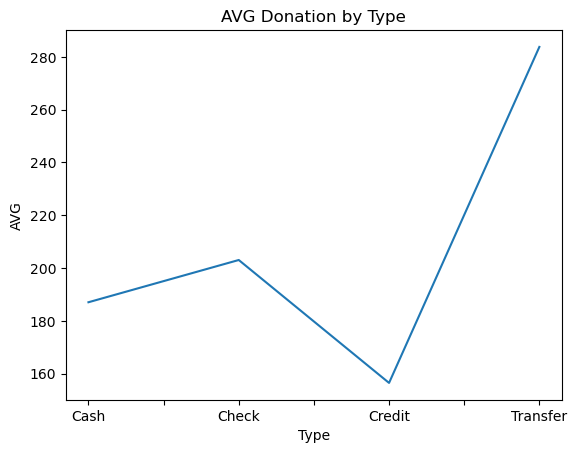

In [27]:
# גרף של תרומה ממוצעת בכל סוג תשלום
donations.groupby("Type")["Amount"].mean().plot()
plt.title('AVG Donation by Type')
plt.xlabel("Type")
plt.ylabel("AVG")

In [ ]:
# ניתן להסיק כי התרומות הגבוהות מתבצעות בהעברות בנקאיות

In [7]:
# תרומה ממוצעת בכל איזור גיוס
donations_with_regions = donations.merge(donors).merge(regions)
donations_with_regions.groupby("RegionName")["Amount"].mean()

RegionName
Central District      220.5
Jerusalem District    199.0
Northern District     206.5
Southern District     208.0
Tel Aviv District     198.5
Name: Amount, dtype: float64

In [ ]:
# ניתן להסיק כי במחוזהמרכז מתקבלות התרומות הגבוהות ביותר

In [8]:
# סה"כ תרומות שגויסו ע"י כל אחד מהמנהלים
donations_with_regions.groupby("Manager")["Amount"].sum()

Manager
Amir Shalom      2065.0
Dan Cohen        1985.0
Ilan Peretz      2080.0
Moshe Levi       1990.0
Yossi Mizrahi    2205.0
Name: Amount, dtype: float64

In [ ]:
# ניתן להסיק שהמנהל יוסי מזרחי גייס הכי הרבה תרומות 

In [9]:
# סה"כ תרומות לפי חודשים
donations["Month"] = pd.to_datetime(donations["Date"]).dt.month
donations.groupby("Month")["Amount"].sum()

Month
1    6195.0
2    4130.0
Name: Amount, dtype: float64

In [ ]:
# ניתן להסיק כי בחודש ינואר גייסו יותר תרומות מחודש פברואר

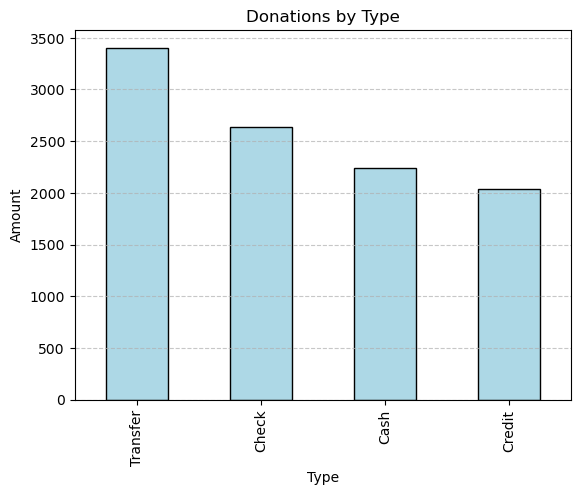

In [10]:
# גרף להצגת התפלגות התרומות לפי סוג
donations.groupby("Type")["Amount"].sum().sort_values(ascending=False).plot(kind='bar',color="lightblue", edgecolor="black")
plt.title('Donations by Type')
plt.xlabel("Type")
plt.ylabel("Amount")
plt.grid(axis='y', linestyle='--', alpha=0.7)

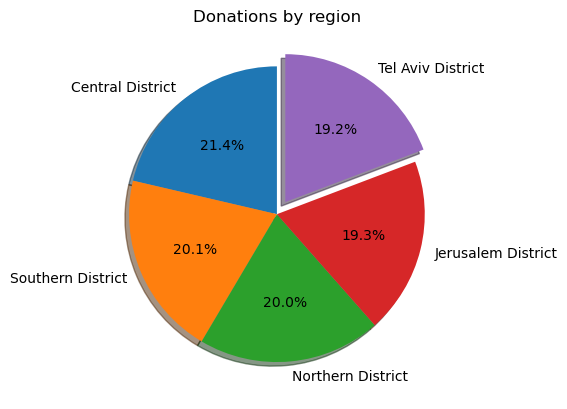

In [11]:
# גרף להצגת התפלגות התרומות לפי איזורים
donations_with_regions.groupby("RegionName")["Amount"].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%', startangle=90,shadow=True,explode=(0,0,0,0,0.1))
plt.title("Donations by region")
plt.ylabel("") 

Text(70.72222222222221, 0.5, 'RegionName')

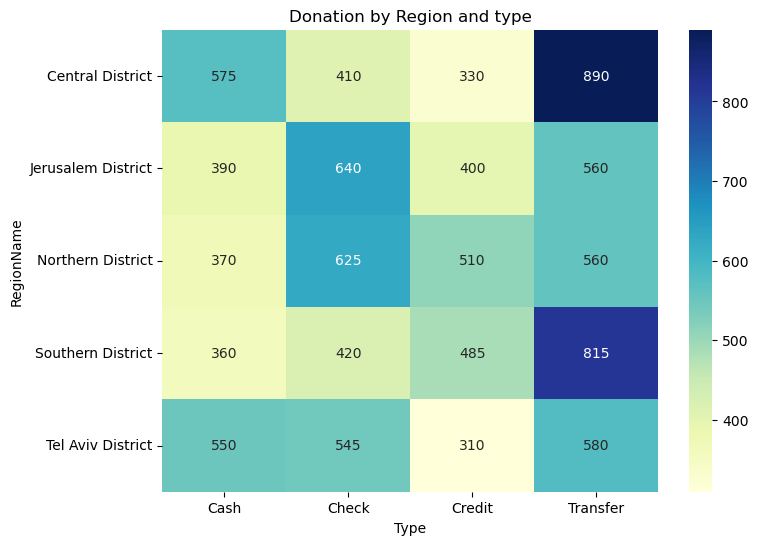

In [24]:
# התפלגות אמצעי תשלום לפי אזורים במטרה להבין באיזה איזור יש צורך לעודד שימוש באשראי
sum_by_region_and_type = donations_with_regions.groupby(["RegionName", "Type"])["Amount"].sum().unstack()

plt.figure(figsize=(8,6))
sb.heatmap(sum_by_region_and_type, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Donation by Region and type")
plt.xlabel("Type")
plt.ylabel("RegionName")


In [ ]:
# ניתן להסיק כי בתל אביב ובמחוז המרכז נעשה שימוש מצומצם בכרטיס אשראי וכדאי לפעול להגדיל אותו

([<matplotlib.axis.XTick at 0x1b3c0686850>,
 [Text(100.0, 0, '100'),
  Text(115.0, 0, '115'),
  Text(131.0, 0, '131'),
  Text(146.0, 0, '146'),
  Text(161.0, 0, '161'),
  Text(177.0, 0, '177'),
  Text(192.0, 0, '192'),
  Text(207.0, 0, '207'),
  Text(223.0, 0, '223'),
  Text(238.0, 0, '238'),
  Text(253.0, 0, '253'),
  Text(269.0, 0, '269'),
  Text(284.0, 0, '284'),
  Text(299.0, 0, '299'),
  Text(315.0, 0, '315'),
  Text(330.0, 0, '330')])

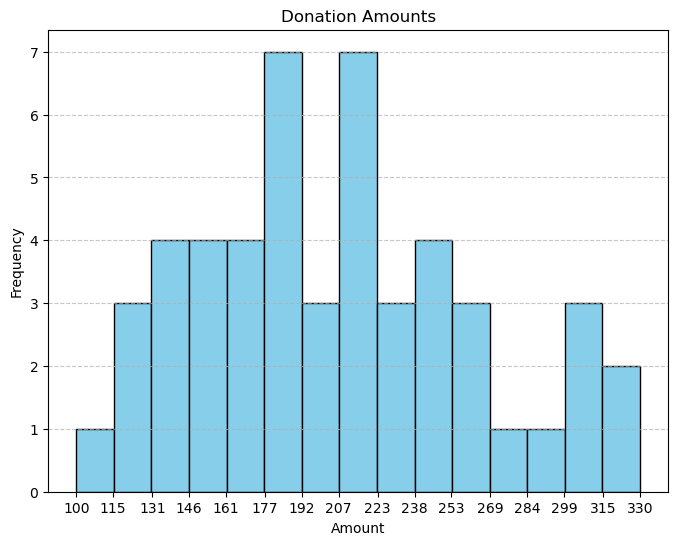

In [31]:
# הצגת תדירות הפעמים עבור כל סכום תרומה
plt.figure(figsize=(8,6))
counts, bins, patches=plt.hist(donations_with_regions["Amount"], bins=15, color='skyblue', edgecolor='black')
plt.title("Donation Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins.round(0)) 